In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
original_train = pd.read_csv('./train.csv')
original_dev = pd.read_csv('./dev.csv')

In [7]:
print(f'Length of Original Train dataset : {len(original_train)}')
print(f'Length of Original Dev dataset : {len(original_dev)}')

Length of Original Train dataset : 9324
Length of Original Dev dataset : 550


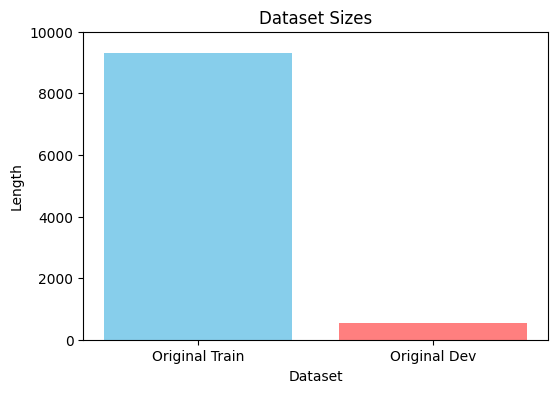

In [8]:
length_train = len(original_train)
length_dev = len(original_dev)

# Data for plotting
datasets = ['Original Train', 'Original Dev']
lengths = [length_train, length_dev]

# Create a bar chart
fig, axe = plt.subplots(1, 1, figsize=(6,4))
axe.bar(datasets, lengths, color=['#87CEEB', '#FF7F7F'])

# Add titles and labels
axe.set_title('Dataset Sizes')
axe.set_xlabel('Dataset')
axe.set_ylabel('Length')
axe.set_ylim(0, 10000)

# Show the plot
plt.show()

In [9]:
new_train = pd.read_csv('./new_train.csv')
new_dev = pd.read_csv('./new_dev.csv')

In [10]:
print(f'Length of New Train dataset : {len(new_train)}')
print(f'Length of New Dev dataset : {len(new_dev)}')

Length of New Train dataset : 7899
Length of New Dev dataset : 1975


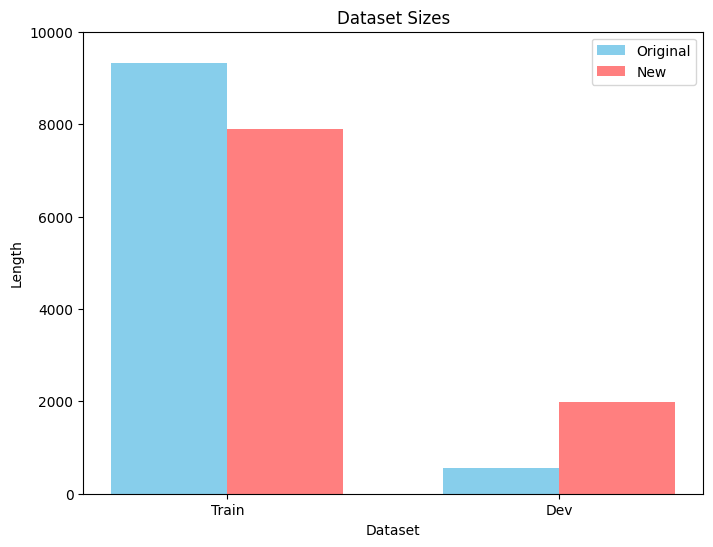

In [11]:
import numpy as np

length_new_train = len(new_train)
length_new_dev = len(new_dev)


datasets = ['Train', 'Dev']
original_lengths = [length_train, length_dev]
new_lengths = [length_new_train, length_new_dev]

bar_width = 0.35

# Set position of bars on X axis
r1 = np.arange(len(datasets))
r2 = [x + bar_width for x in r1]

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create bars for Original datasets
ax.bar(r1, original_lengths, color='#87CEEB', width=bar_width, label='Original')

# Create bars for New datasets
ax.bar(r2, new_lengths, color='#FF7F7F', width=bar_width, label='New')

# Add titles and labels
ax.set_title('Dataset Sizes')
ax.set_xlabel('Dataset')
ax.set_ylabel('Length')
ax.set_xticks([r + bar_width / 2 for r in range(len(datasets))])
ax.set_xticklabels(datasets)

# Add y-axis limit
ax.set_ylim(0, 10000)

# Add legend
ax.legend()

plt.show()

In [12]:
new_train = pd.read_csv('./aug_train_final.csv')

In [13]:
print(f'Length of aug_train_final dataset : {len(new_train)}')

Length of aug_train_final dataset : 28722


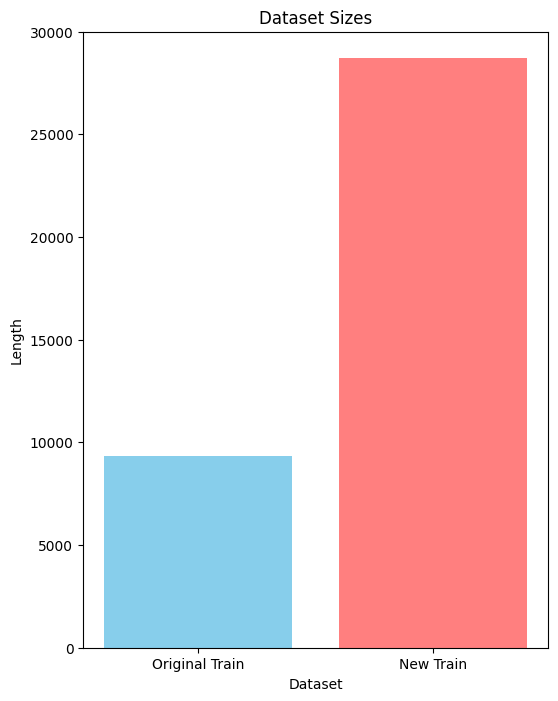

In [28]:
length_train = len(original_train)
length_new_train = len(new_train)

# Data for plotting
datasets = ['Original Train', 'New Train']
lengths = [length_train, length_new_train]

# Create a bar chart
fig, axe = plt.subplots(1, 1, figsize=(6,8))
axe.bar(datasets, lengths, color=['#87CEEB', '#FF7F7F'])

# Add titles and labels
axe.set_title('Dataset Sizes')
axe.set_xlabel('Dataset')
axe.set_ylabel('Length')
axe.set_ylim(0, 30000)

# Show the plot
plt.show()

## 각 라벨 별 문장 길이 분석 및 시각화

In [14]:
original_train['sentence_1_length'] = original_train['sentence_1'].apply(len)
original_train['sentence_2_length'] = original_train['sentence_2'].apply(len)

original_train['length_difference'] = original_train['sentence_1_length'] - original_train['sentence_2_length']

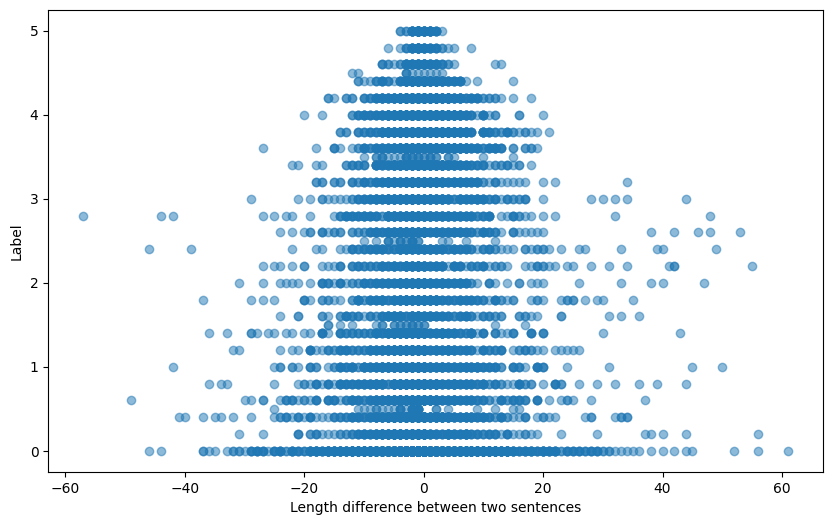

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(original_train['length_difference'], original_train['label'], alpha=0.5)
plt.xlabel('Length difference between two sentences')
plt.ylabel('Label')
plt.show()

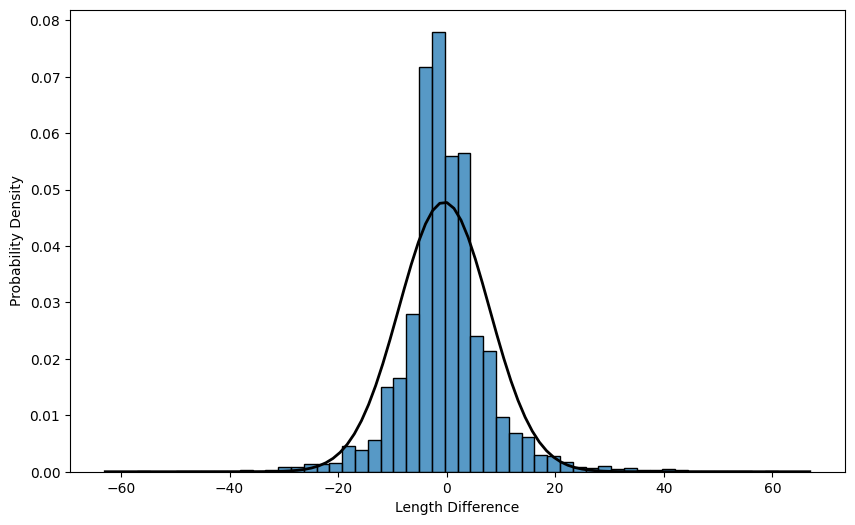

In [16]:
import seaborn as sns
from scipy.stats import norm

plt.figure(figsize=(10, 6))
sns.histplot(original_train['length_difference'], kde=False, stat="density", bins=50)

mean, std_dev = norm.fit(original_train['length_difference'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Length Difference')
plt.ylabel('Probability Density')
# plt.title('Normal Distribution of Length Difference')
plt.show()

In [17]:
new_train['sentence_1_length'] = new_train['sentence_1'].apply(len)
new_train['sentence_2_length'] = new_train['sentence_2'].apply(len)

new_train['length_difference'] = new_train['sentence_1_length'] - new_train['sentence_2_length']

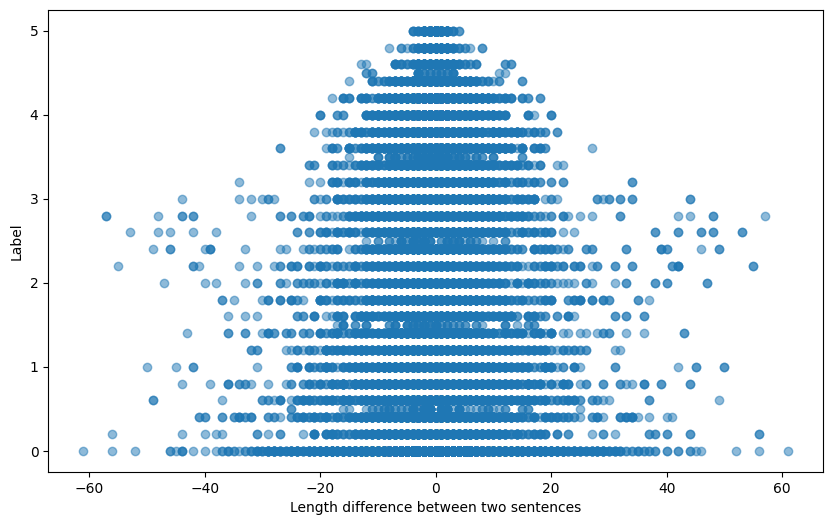

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(new_train['length_difference'], new_train['label'], alpha=0.5)
plt.xlabel('Length difference between two sentences')
plt.ylabel('Label')
plt.show()

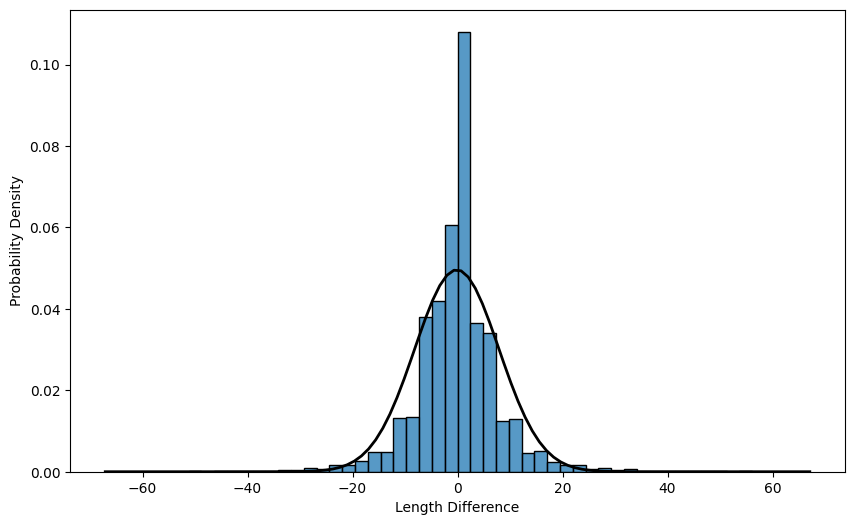

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(new_train['length_difference'], kde=False, stat="density", bins=50)

mean, std_dev = norm.fit(new_train['length_difference'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Length Difference')
plt.ylabel('Probability Density')
# plt.title('Normal Distribution of Length Difference')
plt.show()

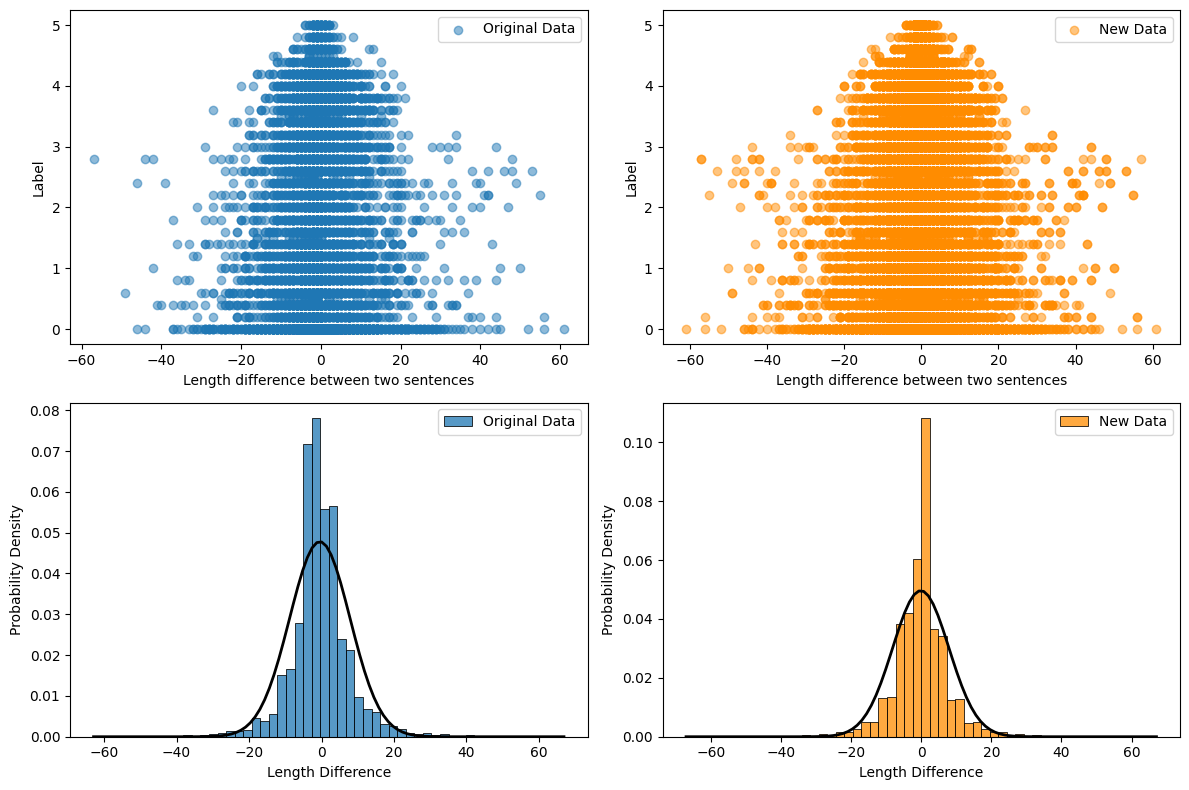

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].scatter(original_train['length_difference'], original_train['label'], alpha=0.5, label='Original Data')
axes[0, 0].set_xlabel('Length difference between two sentences')
axes[0, 0].set_ylabel('Label')
axes[0, 0].legend()

sns.histplot(original_train['length_difference'], kde=False, stat="density", bins=50, ax=axes[1, 0], label='Original Data')
mean, std_dev = norm.fit(original_train['length_difference'])
xmin, xmax = axes[1, 0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
axes[1, 0].plot(x, p, 'k', linewidth=2)
axes[1, 0].set_xlabel('Length Difference')
axes[1, 0].set_ylabel('Probability Density')
axes[1, 0].legend()

axes[0, 1].scatter(new_train['length_difference'], new_train['label'], color='darkorange', alpha=0.5, label='New Data')
axes[0, 1].set_xlabel('Length difference between two sentences')
axes[0, 1].set_ylabel('Label')
axes[0, 1].legend()

sns.histplot(new_train['length_difference'], kde=False, stat="density", bins=50, color='darkorange', ax=axes[1, 1], label='New Data')
mean, std_dev = norm.fit(new_train['length_difference'])
xmin, xmax = axes[1, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
axes[1, 1].plot(x, p, color='black', linewidth=2)
axes[1, 1].set_xlabel('Length Difference')
axes[1, 1].set_ylabel('Probability Density')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

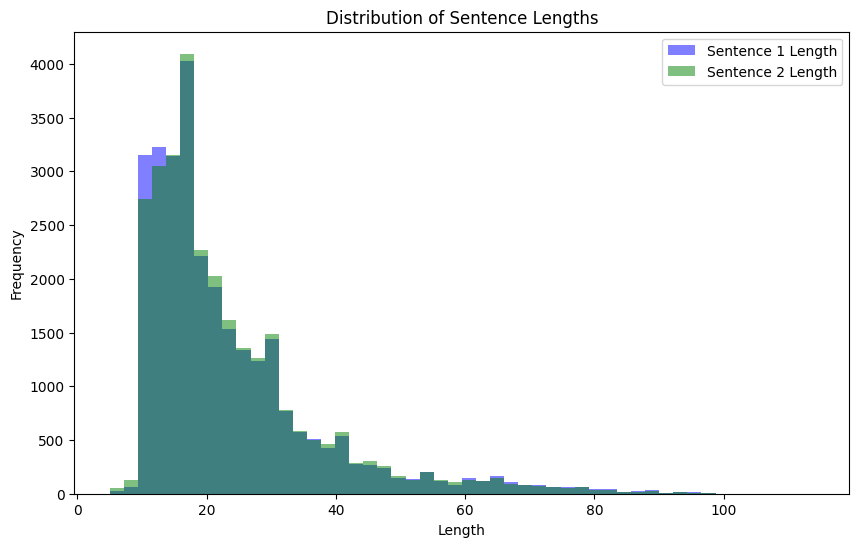

In [21]:
sentence_1_length = new_train['sentence_1'].apply(len)
sentence_2_length = new_train['sentence_2'].apply(len)

plt.figure(figsize=(10, 6))

sns.histplot(sentence_1_length, color='blue', label='Sentence 1 Length', bins=50, alpha=0.5, edgecolor=None)

sns.histplot(sentence_2_length, color='green', label='Sentence 2 Length', bins=50, alpha=0.5, edgecolor=None)

plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.legend()

plt.show()